In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv("car data.csv")

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
data.shape

(301, 9)

In [7]:
data.Fuel_Type.value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [8]:
data.Seller_Type.value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [9]:
data.Transmission.value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

# Encoding the categorical data

In [11]:
data.replace({'Fuel_Type':{'Petrol':0 , 'Diesel':1 ,'CNG':2}},inplace = True)

In [13]:
data.replace({'Seller_Type':{'Dealer':0 , 'Individual':1}},inplace = True)

In [15]:
data.replace({'Transmission':{'Manual':0 , 'Automatic':1}},inplace = True)

In [16]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Splitting the data in to training and testing

In [18]:
x = data.drop(['Car_Name','Selling_Price'],axis=1)

In [19]:
y = data.Selling_Price

In [20]:
x.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [21]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

In [25]:
LR = LinearRegression()

In [26]:
LR.fit(x_train,y_train)

LinearRegression()

In [38]:
pred_LR = LR.predict(x_train)

In [39]:
pred_LR

array([ 7.10723291e+00,  7.15382116e-01,  7.61249634e+00,  3.57230985e+00,
        1.82052565e+00,  5.62063968e+00,  6.64407484e+00, -2.48019121e+00,
        8.82132902e+00,  8.91849508e+00,  2.00780146e+01,  4.41907764e+00,
        4.11961032e+00,  6.31533942e+00,  9.59114613e+00,  1.13679998e-01,
        1.69161805e+00,  5.18465650e+00,  7.01854601e+00,  8.21067793e+00,
        4.20220738e+00,  4.92812560e+00,  2.04324685e+01,  1.76410174e+00,
        1.31150054e+00,  2.89754870e-01,  1.97793980e+00,  3.40493679e+00,
        1.11131076e+00,  3.60488612e+00,  6.46782406e+00,  2.57077563e+00,
        2.15818045e+01,  4.33944119e+00,  5.63244838e+00,  8.82928095e+00,
        7.40890423e+00,  3.27531730e+00,  2.62642318e+00,  3.91503973e+00,
        2.91647908e+00,  1.78933067e+00,  6.51444328e+00, -1.96223983e+00,
        4.36282066e+00,  6.86678400e-01,  8.13801313e+00, -3.63493474e+00,
        2.91320886e+00,  1.36571196e+00,  1.08723396e+01,  5.81201300e+00,
        6.42676814e+00,  

In [41]:
rmse = np.sqrt(metrics.mean_squared_error(y_train,pred_LR))
rmse

1.7814008063879632

In [42]:
error_score = metrics.r2_score(y_train,pred_LR)

In [43]:
error_score

0.8787289819887416

# Visualization

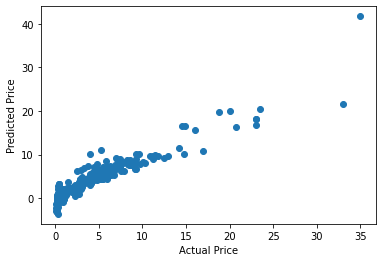

In [44]:
plt.scatter(y_train,pred_LR)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

In [45]:
pred_LR_test = LR.predict(x_test)

In [48]:
rmse_test = np.sqrt(metrics.mean_squared_error(y_test,pred_LR_test))
rmse_test

1.6682909698181987

In [49]:
error_score_test = metrics.r2_score(y_test,pred_LR_test)
error_score_test

0.8735518306724901

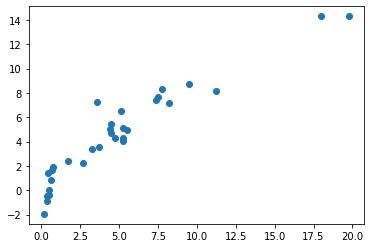

In [50]:
plt.scatter(y_test,pred_LR_test)
plt.show()

In [54]:
#Lasso Regression

In [55]:
Lasso_R = Lasso()

In [56]:
Lasso_R.fit(x_train,y_train)

Lasso()

In [57]:
pred_Lasso_Train = Lasso_R.predict(x_train)

In [59]:
rmse_Train = np.sqrt(metrics.mean_squared_error(y_train,pred_Lasso_Train))
rmse

1.7814008063879632

In [60]:
error_score_Train = metrics.r2_score(y_train,pred_Lasso_Train)
error_score_Train

0.8433838202800137

In [61]:
pred_Lasso_Test = Lasso_R.predict(x_test)

In [63]:
rmse_Test = np.sqrt(metrics.mean_squared_error(y_test,pred_Lasso_Test))
rmse_test

1.6682909698181987

In [64]:
error_score_Test = metrics.r2_score(y_test,pred_Lasso_Test)
error_score_Test

0.8229445127489571